# Métodos e Argumentos de Print

In [6]:
nome="Mauro Mahassa"
print(nome, end="\n") 

Mauro Mahassa


# Lists and Tuples

# COnditions

In [9]:
student_name="Alice"
student_age=20
if student_age<20:
    print("{} Is under 20".format(student_name))
else:
    print("{} Is over 20".format(student_name))

Alice Is over 20


In [3]:
import numpy as np
import pandas as pd
np.random.seed(123)
df1 = pd.DataFrame({"x": np.random.uniform(size=50), "y": np.random.uniform(size=50), "target": np.repeat(0, 50)})
df2 = pd.DataFrame({"x": np.random.uniform(-1, 0, size=50), "y": np.random.uniform(-1, 0, size=50), "target": np.repeat(1, 50)})
df = pd.concat([df1, df2], ignore_index=True)
df

,x,y,target
0,0.696469,0.120629,0
1,0.286139,0.826341,0
2,0.226851,0.603060,0
3,0.551315,0.545068,0
4,0.719469,0.342764,0
...,...,...,...
95,-0.246474,-0.364100,1
96,-0.258138,-0.967802,1
97,-0.951421,-0.255219,1
98,-0.291303,-0.527087,1


In [5]:
data0 = df.query('target == 0').loc[:, ["x", "y"]].values
target0 = df.query('target == 0').loc[:, "target"].values
data1 = df.query('target == 1').loc[:, ["x", "y"]].values
target1 = df.query('target == 1').loc[:, "target"].values

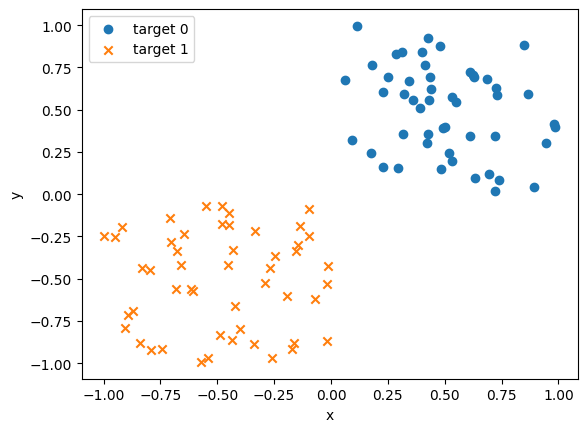

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [7]:
from sklearn.svm import SVC
def plot_boundary_margin_sv(data0, target0, data1, target1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    svc = SVC(kernel=kernel, C=C)  # <-- 1
    svc.fit(np.vstack((data0, data1)), np.hstack((target0, target1)))  # <-- 2
    # 3
    fig, ax = plt.subplots()
    ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
    ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')
    # 4
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=[':', '-', ':'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=250, facecolors='none', edgecolors='red') # <-- 5

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

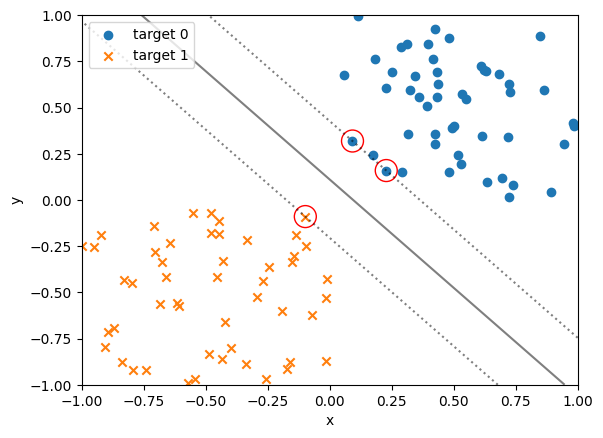

In [8]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='linear', C=1e6)

In [10]:
import pandas as pd

import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
print(data)
#target = raw_df.values[1::2, 2]

[[' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30'
  '  396.90   4.98  24.00']
 [' 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80'
  '  396.90   9.14  21.60']
 [' 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80'
  '  392.83   4.03  34.70']
 ...
 [' 0.06076   0.00  11.930  0  0.5730  6.9760  91.00  2.1675   1  273.0  21.00'
  '  396.90   5.64  23.90']
 [' 0.10959   0.00  11.930  0  0.5730  6.7940  89.30  2.3889   1  273.0  21.00'
  '  393.45   6.48  22.00']
 [' 0.04741   0.00  11.930  0  0.5730  6.0300  80.80  2.5050   1  273.0  21.00'
  '  396.90   7.88  11.90']]


In [11]:
import pandas as pd

import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

target = raw_df.values[1::2, 2]

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_52341/3826360157.py:7: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
